In [111]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## 台積電股價

In [137]:
stock_2330 = yf.Ticker("2330.TW").history(period="max")

stock_2330.reset_index(inplace=True, drop=False)

In [138]:
stock_2330_start_from_2012 = stock_2330[stock_2330["Date"] >= "2012-01"]
stock_2330_start_from_2012

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3053,2012-01-02 00:00:00+08:00,51.647918,51.923374,48.066998,48.066998,26261000,0.0,0.0
3054,2012-01-03 00:00:00+08:00,51.992236,52.267693,48.549042,48.549042,56936000,0.0,0.0
3055,2012-01-04 00:00:00+08:00,52.405418,52.405418,48.549042,48.549042,56684000,0.0,0.0
3056,2012-01-05 00:00:00+08:00,52.336544,52.336544,51.854499,52.336544,56718000,0.0,0.0
3057,2012-01-06 00:00:00+08:00,52.267678,52.267678,51.579040,52.061085,29866000,0.0,0.0
...,...,...,...,...,...,...,...,...
6166,2024-10-04 00:00:00+08:00,986.000000,986.000000,967.000000,977.000000,40934818,0.0,0.0
6167,2024-10-07 00:00:00+08:00,993.000000,1010.000000,989.000000,1005.000000,39667071,0.0,0.0
6168,2024-10-08 00:00:00+08:00,1000.000000,1010.000000,997.000000,1010.000000,30845902,0.0,0.0
6169,2024-10-09 00:00:00+08:00,1030.000000,1035.000000,1020.000000,1020.000000,46975717,0.0,0.0


In [139]:
stock_2330_dataset = stock_2330_start_from_2012[["Date", "Open", "Close", "Volume"]]

In [140]:
stock_2330_dataset.to_csv(r"..\csv\stock\2330stock.csv")

In [116]:
stock_2330_dataset.loc[:, "Date"] = pd.to_datetime(stock_2330_dataset["Date"])
stock_2330_dataset.set_index("Date", inplace=True)

In [117]:
# 每月的最後一天為收盤價
monthly_data = stock_2330_dataset["Close"].resample("ME").last()
monthly_data

Date
2012-01-31 00:00:00+08:00      54.058147
2012-02-29 00:00:00+08:00      55.848606
2012-03-31 00:00:00+08:00      58.465439
2012-04-30 00:00:00+08:00      59.773842
2012-05-31 00:00:00+08:00      58.603157
                                ...     
2024-06-30 00:00:00+08:00     961.711304
2024-07-31 00:00:00+08:00     929.853394
2024-08-31 00:00:00+08:00     939.808960
2024-09-30 00:00:00+08:00     957.000000
2024-10-31 00:00:00+08:00    1045.000000
Freq: ME, Name: Close, Length: 154, dtype: float64

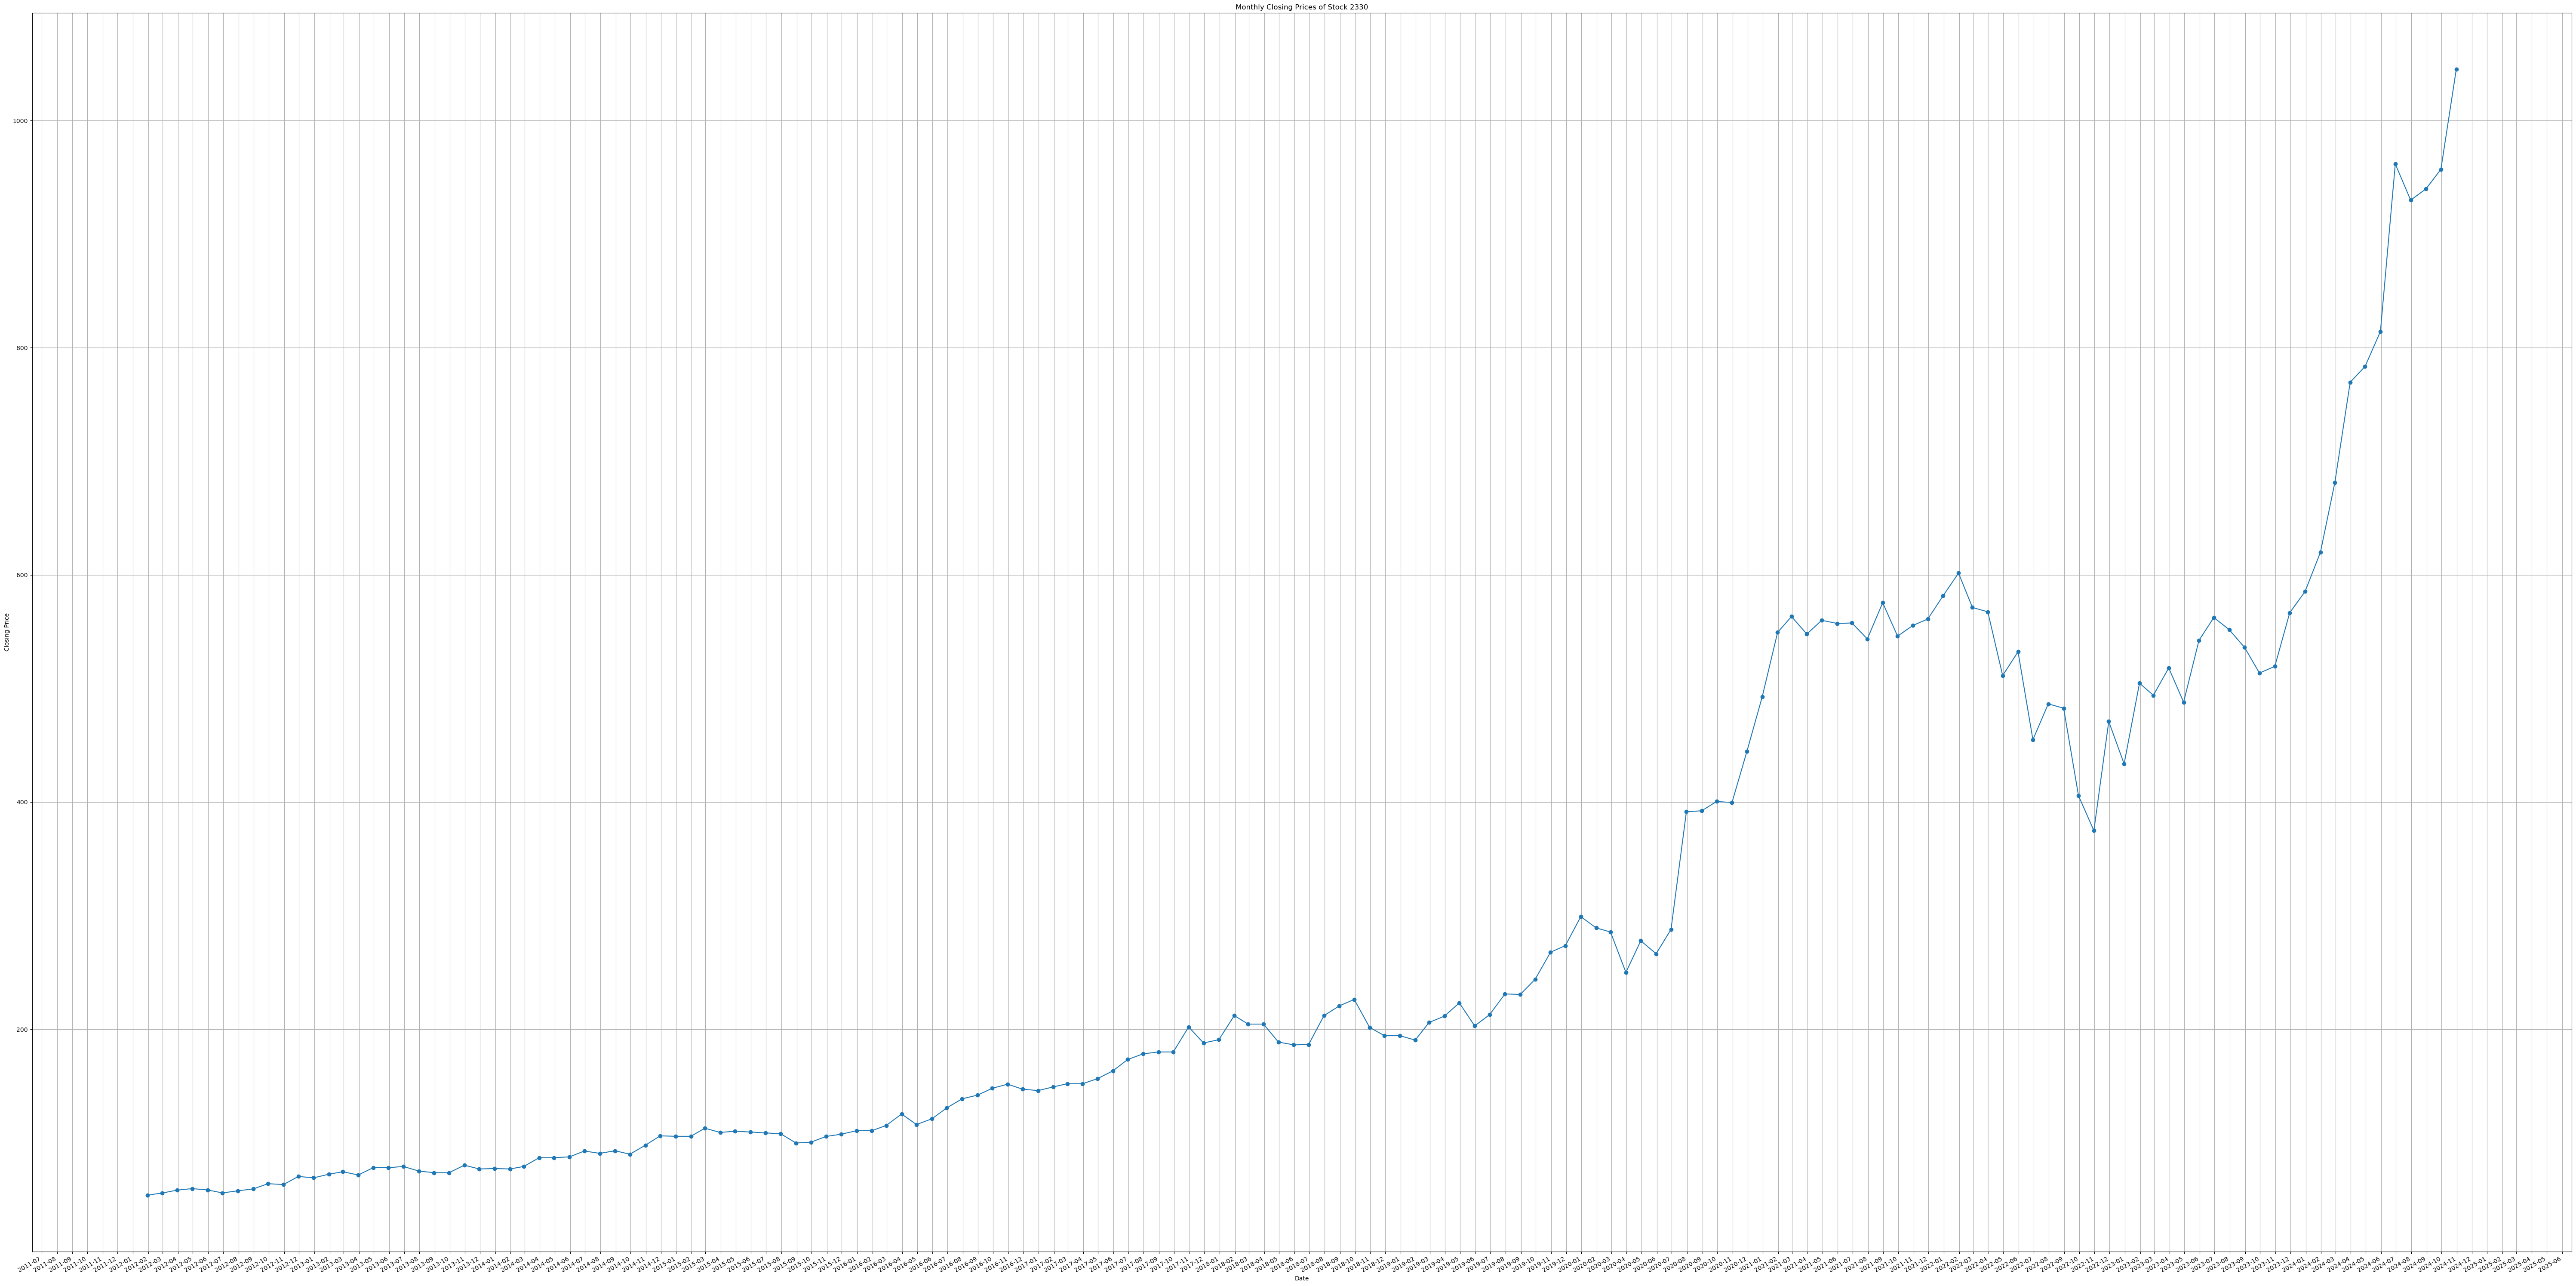

In [118]:
plt.figure(figsize=(60, 30))
plt.plot(monthly_data.index, monthly_data.values, marker="o")
plt.title("Monthly Closing Prices of Stock 2330")
plt.xlabel("Date")
plt.ylabel("Closing Price")
# 設置X軸日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# 設置 x 軸的主刻度為每月
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X軸標籤自動旋轉
plt.gcf().autofmt_xdate()

plt.grid()
plt.tight_layout()
plt.show()

In [119]:
# 使用每季呈現股價
quarterly_data = stock_2330_dataset["Close"].resample("Q").last()
quarterly_data

C:\Users\student\AppData\Local\Temp\ipykernel_17240\1556818071.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = stock_2330_dataset["Close"].resample("Q").last()


Date
2012-03-31 00:00:00+08:00      58.465439
2012-06-30 00:00:00+08:00      55.986351
2012-09-30 00:00:00+08:00      64.124069
2012-12-31 00:00:00+08:00      69.265411
2013-03-31 00:00:00+08:00      71.764679
2013-06-30 00:00:00+08:00      79.262512
2013-09-30 00:00:00+08:00      73.776459
2013-12-31 00:00:00+08:00      77.446945
2014-03-31 00:00:00+08:00      86.990173
2014-06-30 00:00:00+08:00      92.862915
2014-09-30 00:00:00+08:00      90.070854
2014-12-31 00:00:00+08:00     105.833206
2015-03-31 00:00:00+08:00     109.210884
2015-06-30 00:00:00+08:00     108.811630
2015-09-30 00:00:00+08:00     100.679802
2015-12-31 00:00:00+08:00     110.747787
2016-03-31 00:00:00+08:00     125.462509
2016-06-30 00:00:00+08:00     130.785019
2016-09-30 00:00:00+08:00     148.088898
2016-12-31 00:00:00+08:00     146.076813
2017-03-31 00:00:00+08:00     152.113052
2017-06-30 00:00:00+08:00     173.400848
2017-09-30 00:00:00+08:00     180.054108
2017-12-31 00:00:00+08:00     190.865677
2018-03-31 

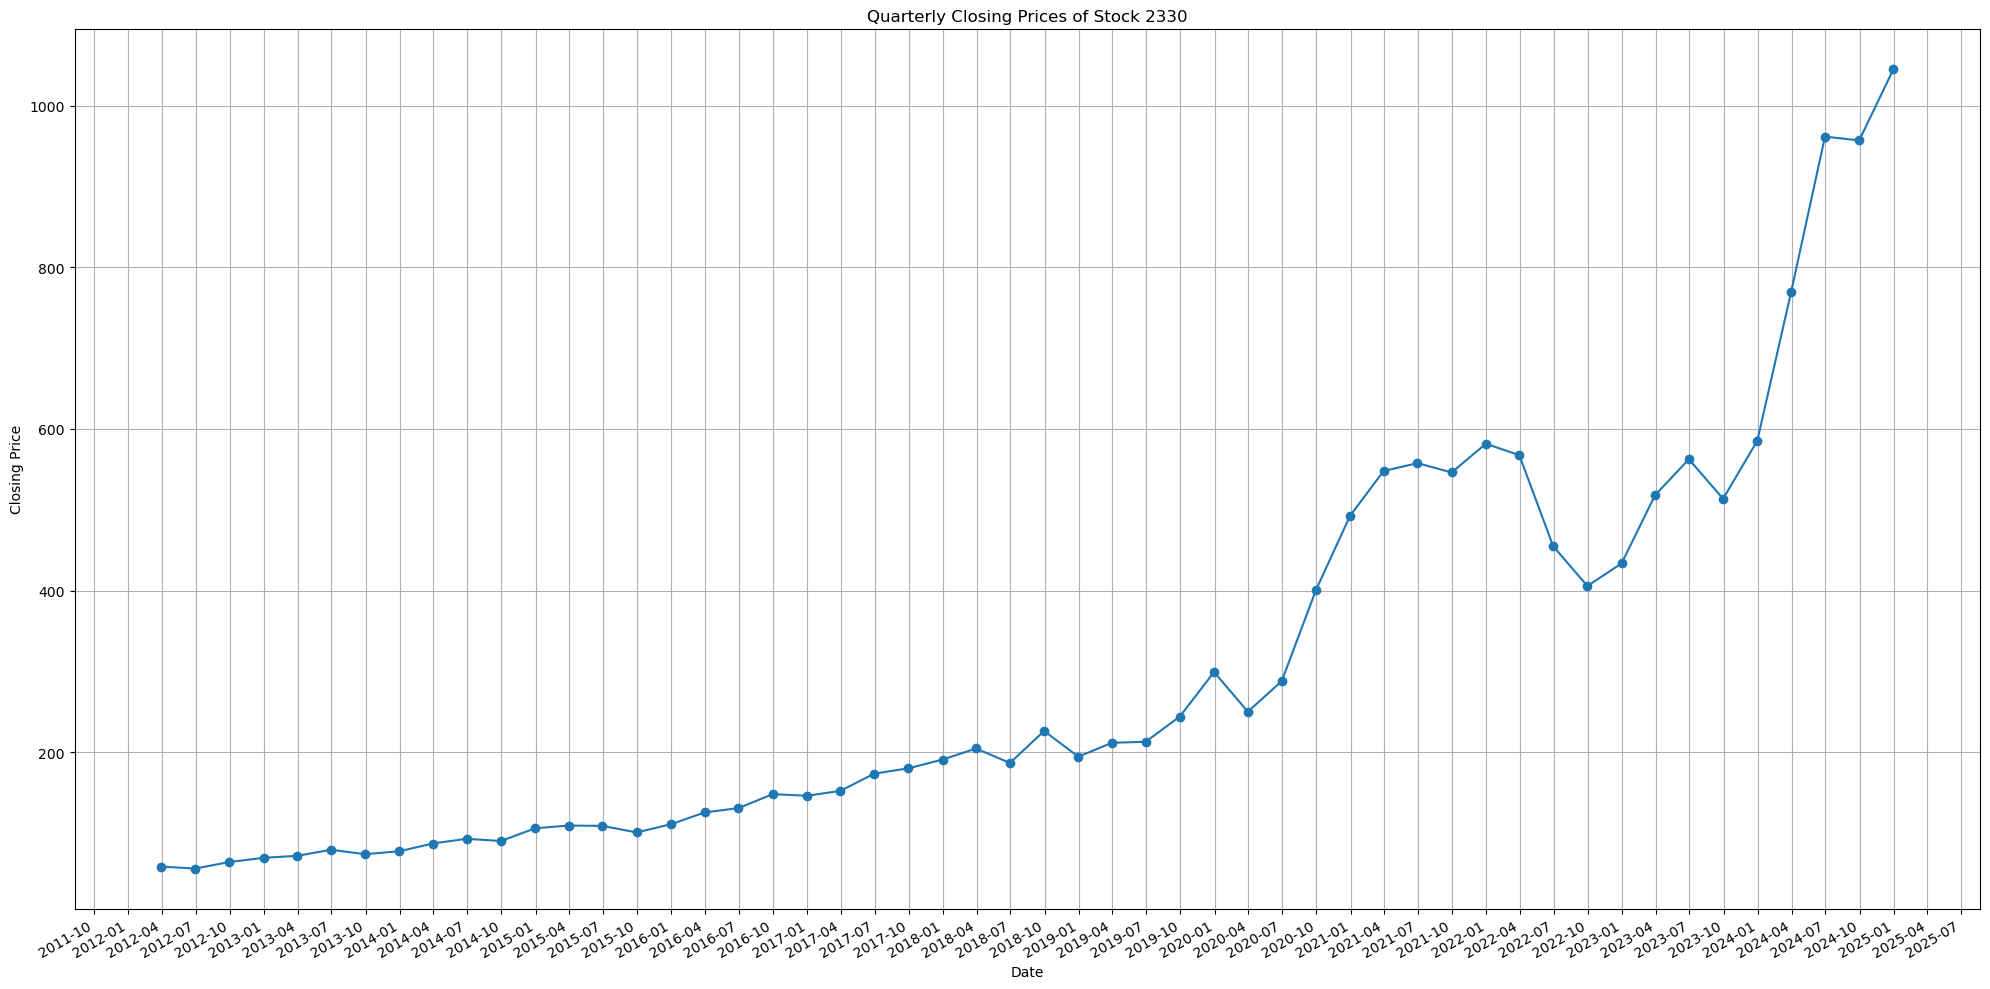

In [120]:
# 繪製圖表
plt.figure(figsize=(20, 10))
plt.plot(quarterly_data.index, quarterly_data.values, marker="o")
plt.title("Quarterly Closing Prices of Stock 2330")
plt.xlabel("Date")
plt.ylabel("Closing Price")

# 設置 x 軸的主要刻度為每季度的第一個月
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每季度的第一個月

# 設置 x 軸的日期格式為 "年-月"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# 自動旋轉日期標籤
plt.gcf().autofmt_xdate()

plt.grid()
plt.tight_layout()
plt.show()

## 加權指數(台股)

In [121]:
tw_stock = yf.Ticker("^TWII").history(period="max")
tw_stock.reset_index(inplace=True, drop=False)

tw_stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-07-02 00:00:00+08:00,9094.228071,9124.258207,8988.088906,8996.678711,0,0.0,0.0
1,1997-07-03 00:00:00+08:00,9061.558439,9061.558439,8997.468887,9027.588867,0,0.0,0.0
2,1997-07-04 00:00:00+08:00,9144.918186,9218.167852,9119.208343,9192.528320,0,0.0,0.0
3,1997-07-07 00:00:00+08:00,9365.148247,9370.367950,9304.778401,9322.797852,0,0.0,0.0
4,1997-07-08 00:00:00+08:00,9345.507631,9371.457709,9282.057722,9305.227539,0,0.0,0.0
...,...,...,...,...,...,...,...,...
6684,2024-10-04 00:00:00+08:00,22459.099609,22493.050781,22193.500000,22302.710938,3632200,0.0,0.0
6685,2024-10-07 00:00:00+08:00,22479.240234,22719.070312,22479.240234,22702.560547,3508600,0.0,0.0
6686,2024-10-08 00:00:00+08:00,22691.320312,22691.320312,22418.380859,22611.390625,3557200,0.0,0.0
6687,2024-10-09 00:00:00+08:00,22637.169922,22885.949219,22637.169922,22659.080078,3670800,0.0,0.0


In [122]:
tw_stock_start_from_2012 = tw_stock[tw_stock["Date"] >= "2012-01"]
tw_stock_start_from_2012

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3577,2012-01-03 00:00:00+08:00,7005.358614,7073.758209,7005.358614,7053.348145,1818200,0.0,0.0
3578,2012-01-04 00:00:00+08:00,7093.037552,7116.187837,7064.547935,7082.937988,2132200,0.0,0.0
3579,2012-01-05 00:00:00+08:00,7099.317527,7130.827148,7073.287373,7130.827148,2209000,0.0,0.0
3580,2012-01-06 00:00:00+08:00,7129.497029,7139.007239,7090.437638,7120.477051,2354400,0.0,0.0
3581,2012-01-09 00:00:00+08:00,7103.057572,7103.057572,7050.217968,7093.007812,1741000,0.0,0.0
...,...,...,...,...,...,...,...,...
6684,2024-10-04 00:00:00+08:00,22459.099609,22493.050781,22193.500000,22302.710938,3632200,0.0,0.0
6685,2024-10-07 00:00:00+08:00,22479.240234,22719.070312,22479.240234,22702.560547,3508600,0.0,0.0
6686,2024-10-08 00:00:00+08:00,22691.320312,22691.320312,22418.380859,22611.390625,3557200,0.0,0.0
6687,2024-10-09 00:00:00+08:00,22637.169922,22885.949219,22637.169922,22659.080078,3670800,0.0,0.0


In [123]:
tw_stock_dataset = tw_stock_start_from_2012[["Date", "Open", "Close", "Volume"]]

In [124]:
tw_stock_dataset.to_csv(r"..\csv\stock\twstock.csv")

In [125]:
tw_stock_dataset.loc[:, "Date"] = pd.to_datetime(tw_stock_dataset["Date"])
tw_stock_dataset.set_index("Date", inplace=True)

In [126]:
# 每月的最後一天為收盤價
tw_stock_monthly_data = tw_stock_dataset["Close"].resample("ME").last()
tw_stock_monthly_data

Date
2012-01-31 00:00:00+08:00     7517.045410
2012-02-29 00:00:00+08:00     8121.402344
2012-03-31 00:00:00+08:00     7932.962891
2012-04-30 00:00:00+08:00     7501.686035
2012-05-31 00:00:00+08:00     7301.466309
                                 ...     
2024-06-30 00:00:00+08:00    23032.250000
2024-07-31 00:00:00+08:00    22199.349609
2024-08-31 00:00:00+08:00    22268.089844
2024-09-30 00:00:00+08:00    22224.539062
2024-10-31 00:00:00+08:00    22901.640625
Freq: ME, Name: Close, Length: 154, dtype: float64

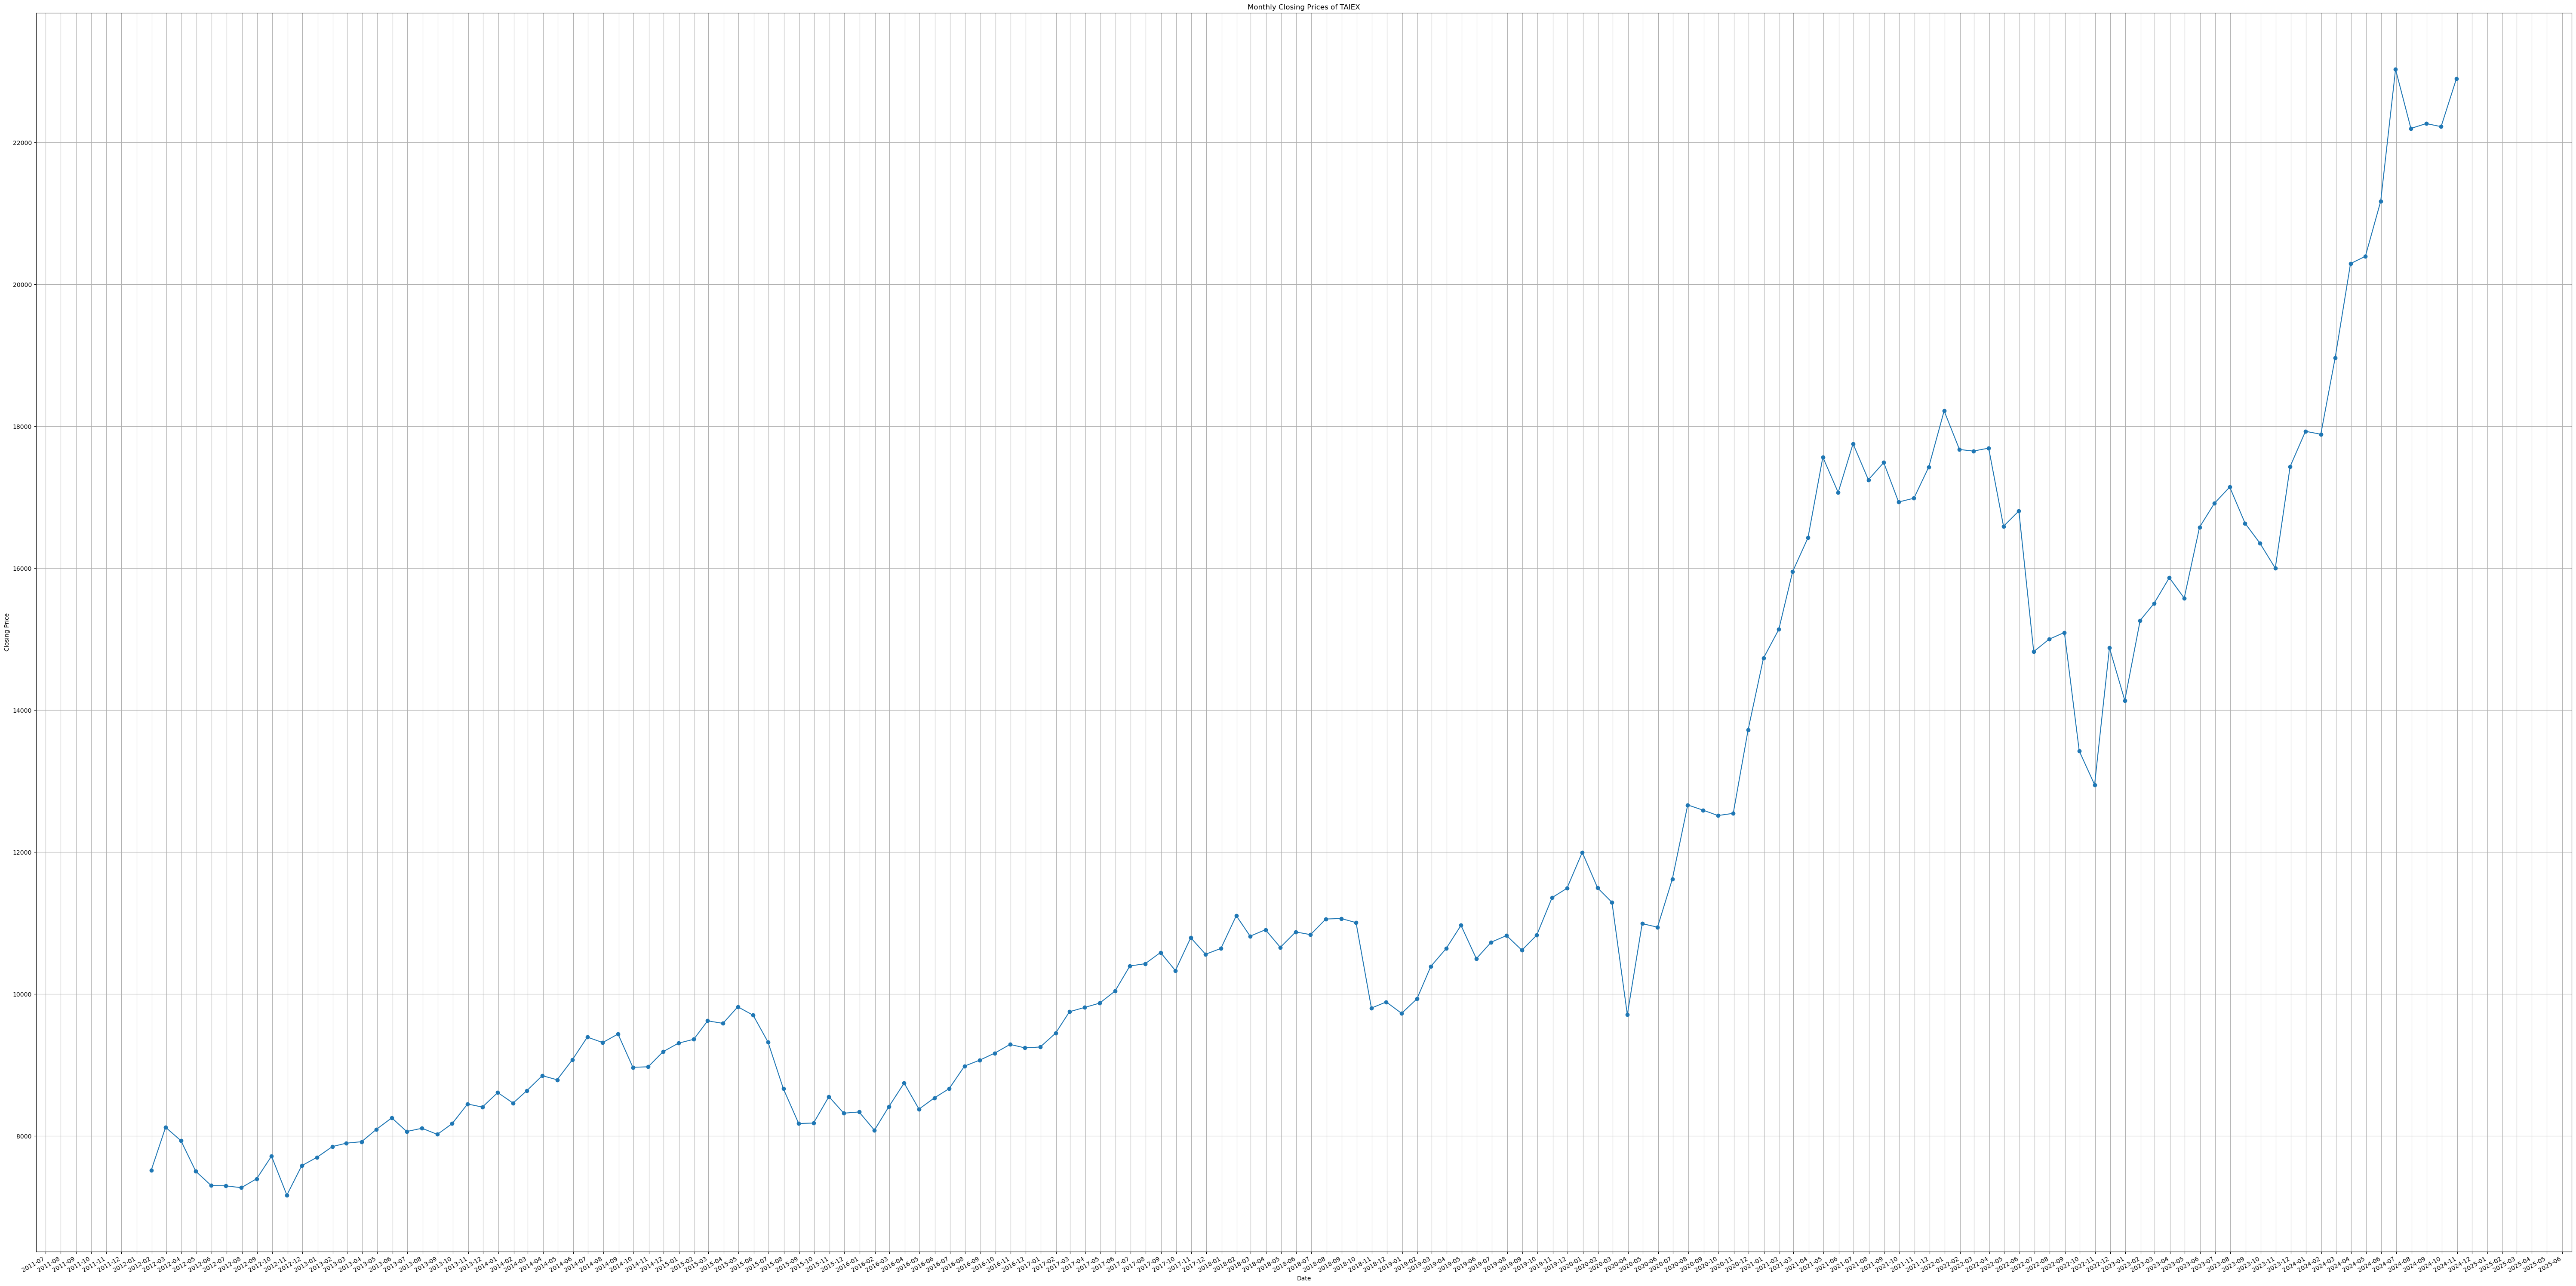

In [127]:
plt.figure(figsize=(60, 30))
plt.plot(tw_stock_monthly_data.index, tw_stock_monthly_data.values, marker="o")
plt.title("Monthly Closing Prices of TAIEX")
plt.xlabel("Date")
plt.ylabel("Closing Price")
# 設置X軸日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# 設置 x 軸的主刻度為每月
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X軸標籤自動旋轉
plt.gcf().autofmt_xdate()

plt.grid()
plt.tight_layout()
plt.show()

In [128]:
# 使用每季呈現股價
tw_stock_quarterly_data = tw_stock_dataset["Close"].resample("Q").last()
tw_stock_quarterly_data

C:\Users\student\AppData\Local\Temp\ipykernel_17240\3062163180.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  tw_stock_quarterly_data = tw_stock_dataset["Close"].resample("Q").last()


Date
2012-03-31 00:00:00+08:00     7932.962891
2012-06-30 00:00:00+08:00     7296.246094
2012-09-30 00:00:00+08:00     7715.125000
2012-12-31 00:00:00+08:00     7699.464844
2013-03-31 00:00:00+08:00     7918.572754
2013-06-30 00:00:00+08:00     8062.172363
2013-09-30 00:00:00+08:00     8173.832520
2013-12-31 00:00:00+08:00     8611.469727
2014-03-31 00:00:00+08:00     8849.240234
2014-06-30 00:00:00+08:00     9393.028320
2014-09-30 00:00:00+08:00     8966.878906
2014-12-31 00:00:00+08:00     9307.217773
2015-03-31 00:00:00+08:00     9586.396484
2015-06-30 00:00:00+08:00     9322.977539
2015-09-30 00:00:00+08:00     8181.202637
2015-12-31 00:00:00+08:00     8338.019531
2016-03-31 00:00:00+08:00     8744.802734
2016-06-30 00:00:00+08:00     8666.559570
2016-09-30 00:00:00+08:00     9166.829102
2016-12-31 00:00:00+08:00     9253.493164
2017-03-31 00:00:00+08:00     9811.512695
2017-06-30 00:00:00+08:00    10395.070312
2017-09-30 00:00:00+08:00    10329.940430
2017-12-31 00:00:00+08:00    

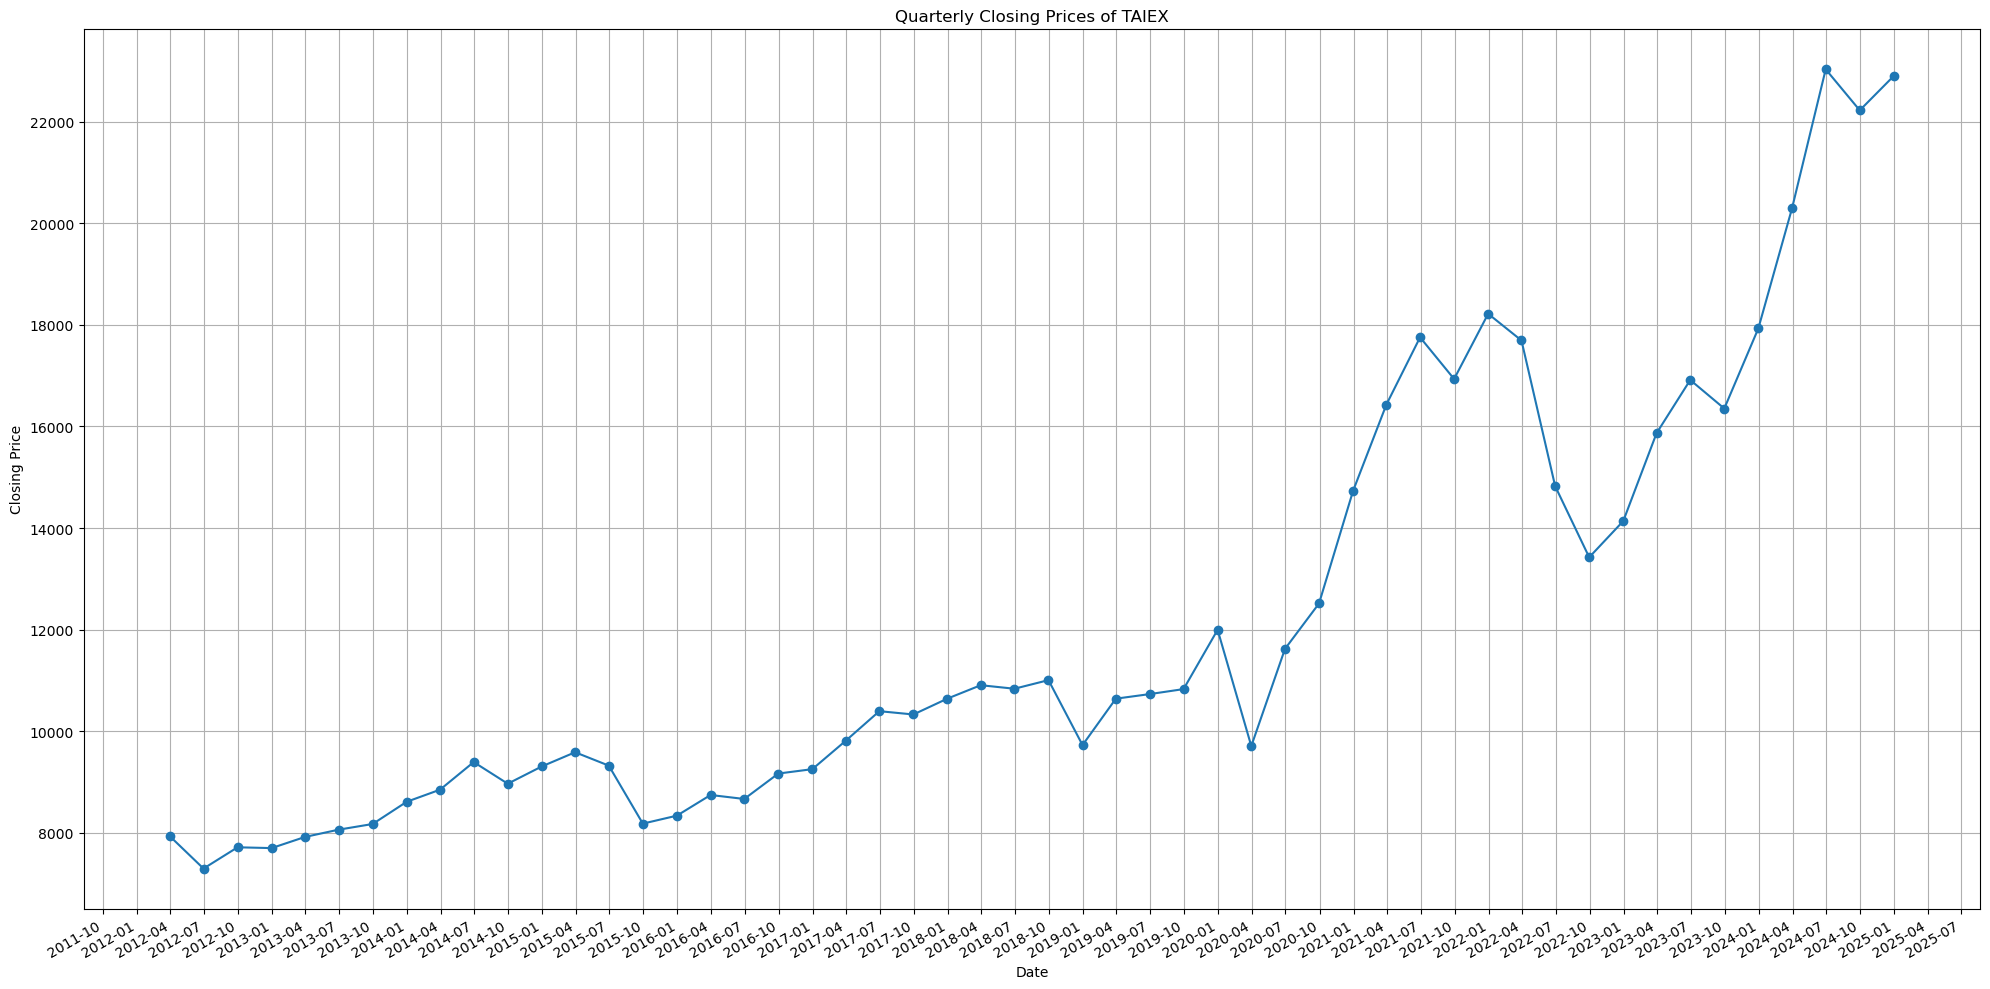

In [129]:
# 繪製圖表
plt.figure(figsize=(20, 10))
plt.plot(tw_stock_quarterly_data.index, tw_stock_quarterly_data.values, marker="o")
plt.title("Quarterly Closing Prices of TAIEX")
plt.xlabel("Date")
plt.ylabel("Closing Price")

# 設置 x 軸的主要刻度為每季度的第一個月
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 每季度的第一個月

# 設置 x 軸的日期格式為 "年-月"
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# 自動旋轉日期標籤
plt.gcf().autofmt_xdate()

plt.grid()
plt.tight_layout()
plt.show()